In [2]:
%matplotlib notebook

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
#load data
df = pd.read_csv("data/vd16fielddata.csv", low_memory=False)

# Seminar *Forschungsdaten in Spätmittelalter und Früher Neuzeit (VD16)*

## IV. Datenanalyse und Visualisierung

### IV.1. Grundlagen

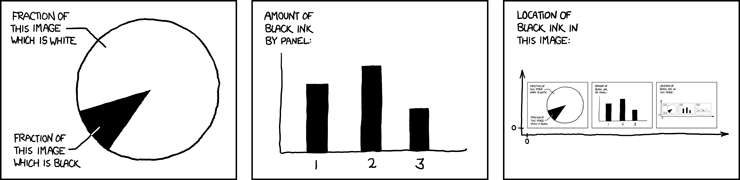

Bildquelle: https://xkcd.com/688/

## Metadatenanalyse mit Python

### Zentrale Bibliotheken

* Pandas: Datenmanagement, Profiling, Analyse
* Numpy: Datenformate (Arrays, Matrizen), performantes Rechnen
* Matplotlib: Statische und interaktive Visualisierung / Plotting

## Pandas Einführungen und Links

* https://pandas.pydata.org/pandas-docs/stable/user_guide/
* https://github.com/jalammar/pandas-intro
* https://data-flair.training/blogs/pandas-tutorials-home/


## Pandas: Datenmanagement und Datenvisualisierung

* 'Hands on' an konkretem Beispiel
* Beispiel aus den VD16-Daten
* mit fragwürdigem Wert für die Untersuchung der Druckpraxis des 16. Jahrhunderts

Untersuchungen zur String-Länge der Titeldaten im VD16-Datenbestand

In [50]:
df["titlelength"] = df["310 "].str.len()

In [6]:
df[["310 ", "titlelength"]].nlargest(20, 'titlelength')

310   titlelength
88689  Gründlicher und beständiger Gegenbericht des d...        567.0
89659  Gründlicher und beständiger Gegenbericht des d...        567.0
56943  Warhaffe und erschrockenliche Geschichte so si...        530.0
26144  Ursachen, so die Kur und Fürsten, auch Stände ...        457.0
87911  Deklaration und bescheidenlicher Bericht der f...        443.0
76671  Poemata, religionis, virtutis, eruditionisque ...        420.0
85376  Apollinis et novem musarum gratulatio in sacro...        413.0
95232  Protestation der durchleuchtigen, hochgebornen...        399.0
130    Raimundi tituli sancte Marie nove sancte Roman...        392.0
98493  AKROSTICHIS || DE || INAUGURATIONE || DN. CHRI...        386.0
16416  Ratschlag, den etliche christliche Pfarrherren...        378.0
78789  ¬Der¬ unvernünftige und unsinnige Bannstrahl d...        375.0
33914  Wahrhaftiger und gründlicher Bericht, wes Ursa...        365.0
26375  Ursachen, so die Kur- und Fürsten, auch Stände...        361.0
26425  Ursachen, so die Kur- und Fürsten, auch Stände...        361.0
29863  Wahrhaftiger und beständiger Unterricht der Sa...        358.0
30218  Wahrhaftiger und beständiger Unterricht der Sa...        358.0
58371  Panegyricus nuptialis in laudem stemmatis anti...        355.0
34707  Wahrhaftige Urgicht und Bekenntnis der landgrä...        351.0
35050  Wahrhaftige Urgicht und Bekenntnis der landgrä...        351.0

<IPython.core.display.Javascript object>


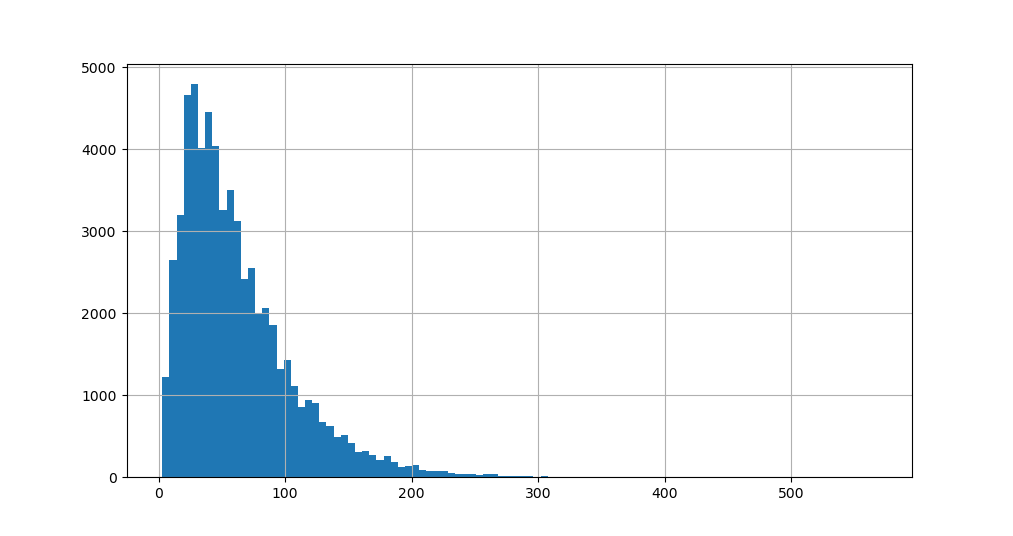

In [12]:
plt.figure()
df["titlelength"].hist(bins = 100)

In [7]:
df["425a_numeric"] = pd.to_numeric(df["425a"], errors = 'coerce')

In [8]:
df[["425a_numeric", "titlelength"]].sort_values(by="425a_numeric")

425a_numeric  titlelength
0             1500.0         45.0
1             1500.0          NaN
2             1500.0         72.0
3             1500.0         25.0
4             1500.0          NaN
...              ...          ...
101611           NaN         54.0
102262           NaN         67.0
103889           NaN         38.0
103890           NaN         26.0
105838           NaN        132.0

[106637 rows x 2 columns]

<IPython.core.display.Javascript object>


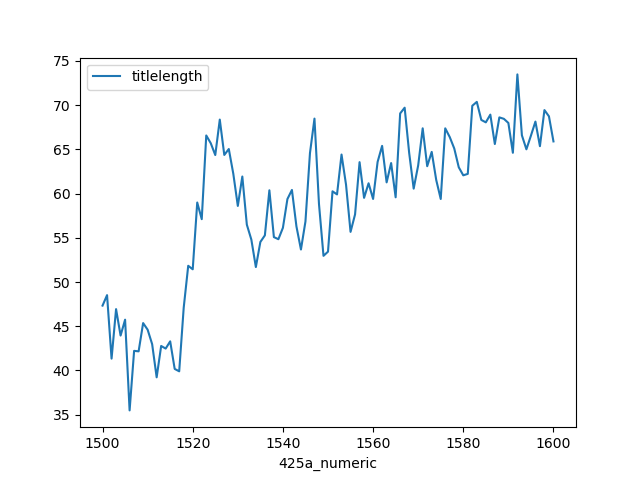

In [18]:
#line chart: Title length over time
df.dropna(subset=["425a_numeric"])[["425a_numeric", "titlelength"]].groupby("425a_numeric").mean().plot.line()

<IPython.core.display.Javascript object>


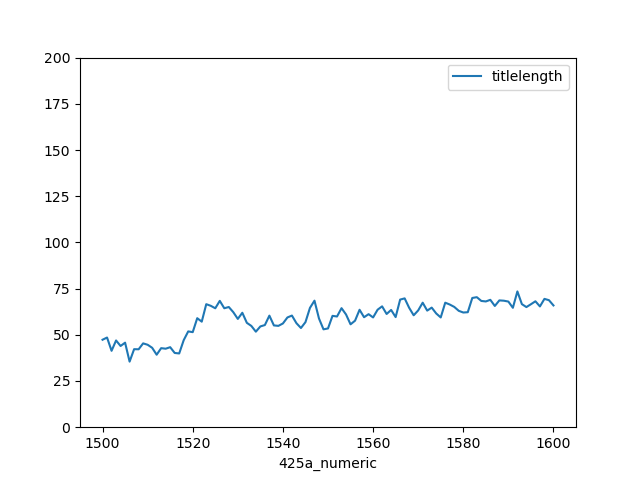

In [19]:
#line chart: Title length over time
df.dropna(subset=["425a_numeric"])[["425a_numeric", "titlelength"]].groupby("425a_numeric").mean().plot.line(ylim=(0,200))

<IPython.core.display.Javascript object>


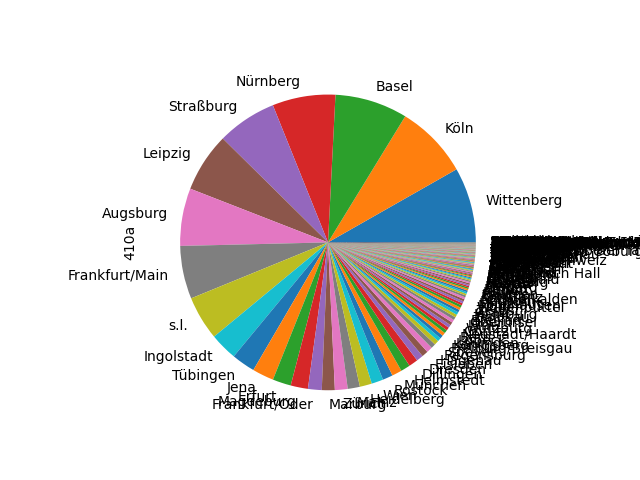

In [24]:
#pie plot of very short titles counted by publication place
plt.figure()
df[df["titlelength"] < 10]["410a"].value_counts().plot.pie()

<IPython.core.display.Javascript object>


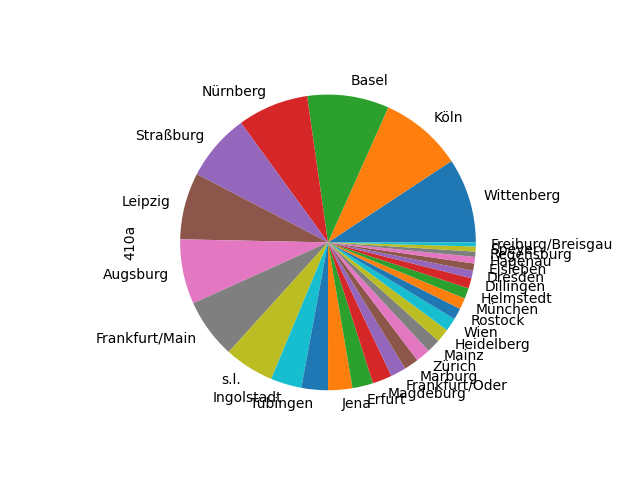

In [25]:
#pie plot of top 30 values - DO NOT DO THIS!
plt.figure()
df[df["titlelength"] < 10]["410a"].value_counts().head(30).plot.pie()

<IPython.core.display.Javascript object>


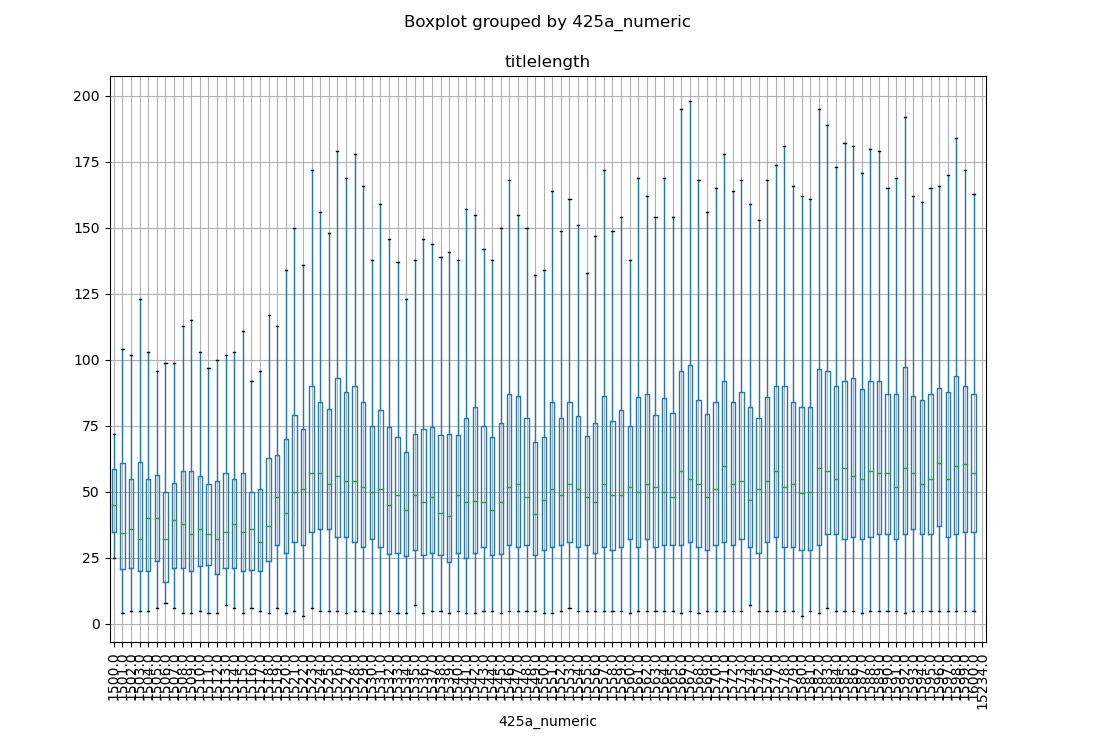

In [20]:
#Box plot
df.dropna(subset=["425a_numeric"]).boxplot("titlelength", by="425a_numeric", showfliers=False, rot=90)

<IPython.core.display.Javascript object>


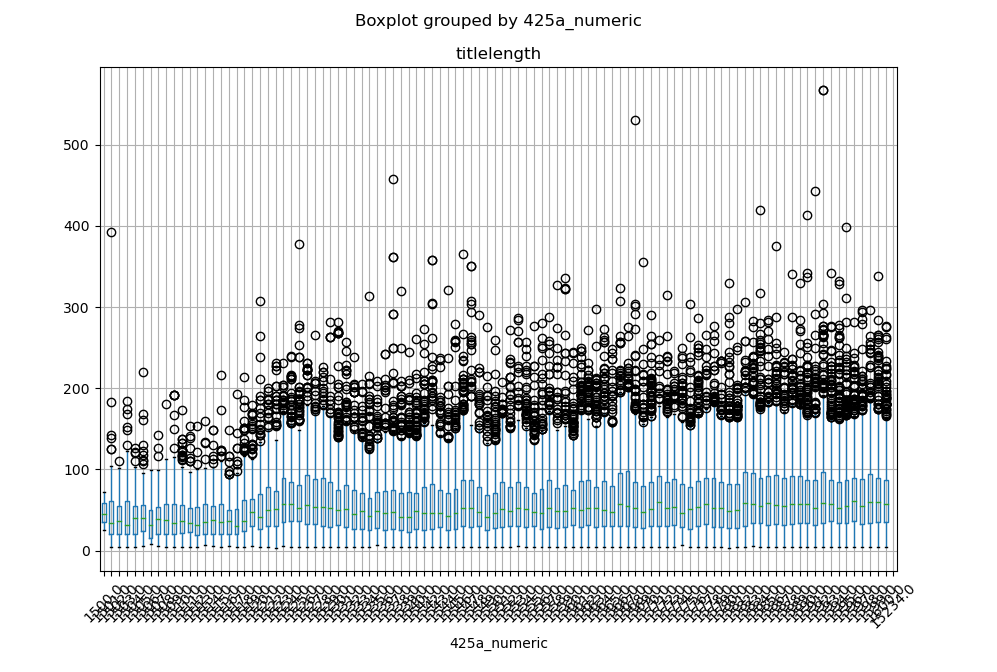

In [39]:
#Box plot
df.dropna(subset=["425a_numeric"]).boxplot("titlelength", by="425a_numeric", rot=45)

In [27]:
df["435_numeric"] = df["435 "].astype(str).str.extract(r'(\d+)', expand=False).astype("float")

<IPython.core.display.Javascript object>


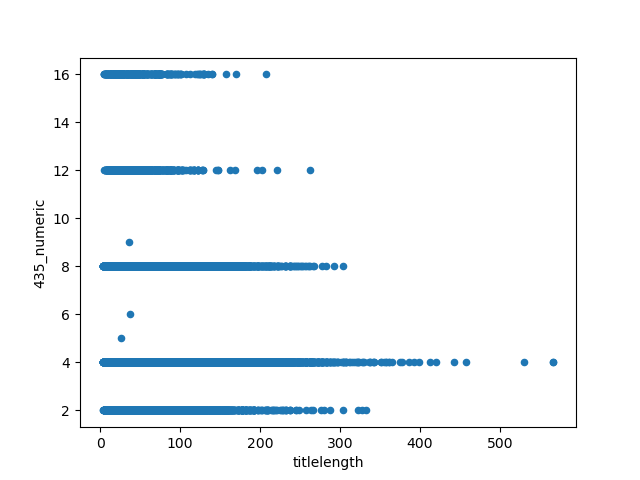

In [35]:
df[df["435_numeric"] <= 16].plot.scatter("titlelength", "435_numeric")

<IPython.core.display.Javascript object>


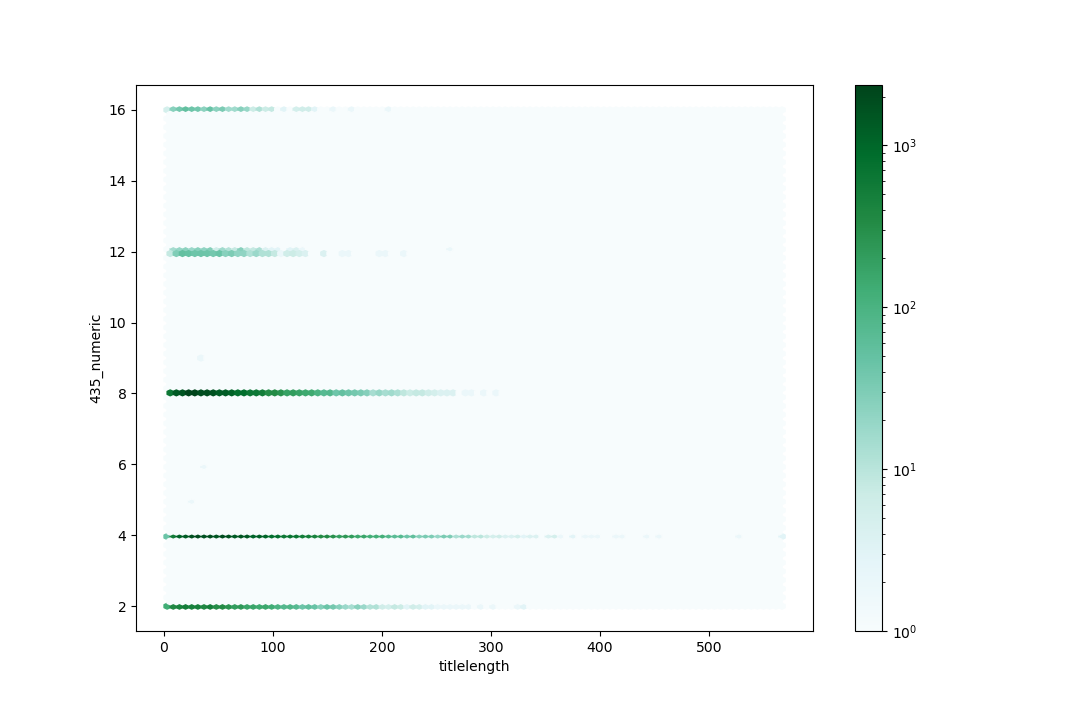

In [40]:
df[df["435_numeric"] <= 16][["titlelength","435_numeric"]].dropna().plot.hexbin(x="titlelength", y="435_numeric", bins = 'log')

## Datenanalyse mit Python Pandas

* Grundlagen leicht zu erlernen
* Steile Lernkurve für vertieftes Arbeiten
* Hoher Abstraktionsgrad, hohe Benutzerfreundlichkeit

Üben, üben, üben